#Electric Relaibility Council of Texas

Team members - Yanbei Zhu, Qian Li, Nitish Ledalla, Deepak Saldanha

#Literature Review

More than 90% of the power outages result from failures in electricity distribution systems. Extreme weather events can have a wide range of effects on the electrical systems infrastructure.High winds can snap wooden poles used for distribution lines. Flooding can damage electrical equipment on the ground. Drought can reduce water supplies for hydroelectric dams. Intense heat can overwhelm transmission line capacity and decrease the efficiency of power plants.



###How machine learnig and deep learning are used to predict grid failures. 

The datasets include power grid operating parameters such as loading level, level of load shedding, the capacity of the failed lines, and parameters like the average shortest distance between two transmission lines. 

These days smart power grids which are two directional unlike traditional power grids, which means that they can capture data from every possible source in the grid at the same time as they are providing electricity. They are able to capture data from smart meters, IoT devices and power generation stations, providing a real-time look at the operating parameters. This data could be leveraged to be leveraged using machine learning models, which can help indentify irregular patterns in the data and predict potential faults before time. 

One of the key issues for power grids is to make sure the demand matches the energy supply. However since renewable energy sources are heavily dependent on weather patterns. Due to the unpredictability of weather patterns, in hybrid power grid system at times the load has to be balanced by using conventional sources, and it could be hard to predict when an opeartor would be required to do so. Using machine learning methods, a forecast of the renewable energy output can be realized. By applying advanced methods like Long Short Term Neural Networks, ml models can take factors like wind, temperature, sunlight and humidity forecasts into consideration and make the best possible predictions. There is also the advantage of feeding historical data to increase the robustness of the model and make better predictions. 
This way would assists the operators to plan better and be more prepared to address irregular weather constraints that distrubt renewable energy power generation.


# Introduction 

* General Electric, the top energy producer in the United States, also employs statistical, machine learning, and neural network techniques to forecast energy demand. Their artificial neural networks use historical data to predict the future values for their short-term outputs. 

* 'EnergyInformatics' have shown the importance of the prediction of the energy demand and production over the next hours and days, which will help the grid operators so that the decision will know how much power is being produced the various other important decisions like operations, planning and storing of the power can be planned well advanced. IEEE Explore has given a solution for the institutions looking to predict the energy demand; they have used all the traditional methods such as regression, time series, statistical methods, and deep learning techniques like the ANN (Artificial neural networks), Support Vector Machine (SVM), and LSTM (Long short term memory). They have used two variants of LSTM, Standard LSTM and the LSTM-based Sequence-to-Sequence (S2S) architecture with one-minute time step resolution, and S2S worked efficiently. 

* In the new research on the renewable energy resources in Europe, they have introduced a new hybrid forecasting system based on the ANN, which incorporates some of the physical model constraints, which are called (Physical Hybridization Artificial Neural Network) 

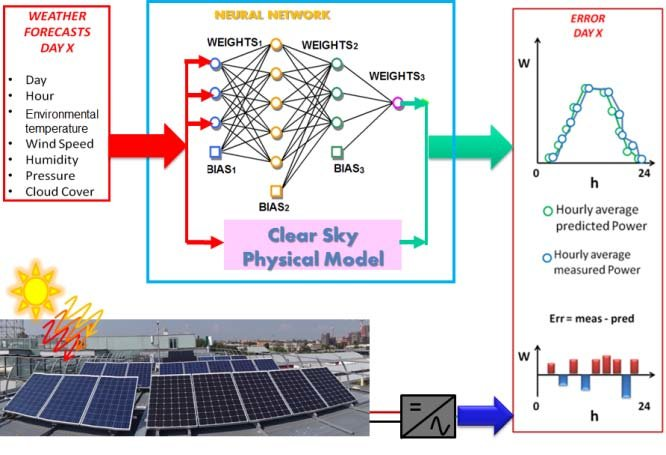

* NRGPRO Predictive Energy Analytics uses different Machine Learning Big data models for reliable energy forecasting. The data and other insights are presented using advanced visual tools, enabling the clients to monitor the crucial factor on a real-time basis.


* Knowledge Mapping in Electricity Demand Forecasting: A Scientometric Insight - "Frontiers" have published their research on the prediction of the energy demand by using the scientometric methods to analyze the emerging trends in the production by employing various statistical descriptive analyses and sophisticated methods like spatiotemporal dynamic characteristics of power loads that change concerning time and forecast the future electricity presented a hybrid model that including multivariate adaptive regression, and multiple linear regression, artificial neural network models to forecast short-term electricity demand in Australia. 

* AleaSoft has developed an Energy forecast software for its clients by merging the statistical methodology. The artificial intelligence few main expansionary variables used in their short-term forecast model are the climatological data such as temperature thermal sensation. 
* Many factors play an essential role in predicting the energy demand, the weather being one of the crucial ones. Energyinformatics states the relation about the correlation between the energy demand and the various parameters in the weather like the wind speed, rainfall, 2m temperature, relative humidity, and net solar radiation. They have used the statistical correlation to determine that temperature and wind speed are vital in predicting energy. Other variables like relative humidity and rainfall do not exhibit a strong correlation. 

* Another exciting utility in energy ExxonMobil is using neural network techniques like CNN in 3-D seismic-imaging technology to map the formation geology and oil-gas deposits under the ocean beds.  



References: 

1. https://www.ge.com/power/transform/article.transform.articles.2017.dec.energy-demand-forecasting-in-a

2. https://ieeexplore.ieee.org/document/7793413?signout=success

3. https://www.researchgate.net/publication/286663846_Hybrid_model_analysis_and_validation_for_PV_energy_production_forecasting

4. https://www.nrg-pro.com/solutions

5. https://aleasoft.com/products-and-services/energy-demand-forecasting/


6. https://www.frontiersin.org/articles/10.3389/fenrg.2021.771433/full

7. https://energyinformatics.springeropen.com/articles/10.1186/s42162-018-0048-9

8. https://corporate.exxonmobil.com/Operations/Energy-technologies/Exploration-technology/Discovering-hidden-hydrocarbons-using-seismic-imaging-technology-to-map-formations#FullWavefieldInversionFWI

# Data Resampling and Cleaning

*  Fristly, we inpute the missing values of each dataset by using **linear interpolation** since this method has the best performance for time series data. The data imputed would be reasonable as linear interpolation requires knowledge of the neighouring value.


*  Secondly, We resampled the weather data hourly and returned the maximum weather value per hour. Then, dropped some related columns to focus on **'tmpf', 'dwpf', and 'relh'**.


*  Thirdly, we selected 2010-2019 data to be the **pre-training dataset** since we would generate columns that have 24 hours shift(i.e. we have to include the data from 12/31/2010 hourly for our feature engineering part). Same reason to have the 2019-2020 data being **pre-test dataset**. 


*  Lastly, we merged two pre-training datasets (one from energy, one from weather) into **'training_merging'** dataset. Same to have **'test_merging'** dataset.

In [1]:
import pandas as pd

In [2]:
# mount your drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Demand/Energy Data

**Reading the data**

In [3]:
energy = pd.read_csv('/content/drive/Shareddrives/Deep Learning Project/RNN Project/Dataset/Raw/Demand.csv') 
energy.head() # raw demand dataset looks like

,Unnamed: 0,Date,HE,MWh
0,0,2010-01-01,1,32094.064435
1,1,2010-01-01,2,32171.322546
2,2,2010-01-01,3,32241.752463
3,3,2010-01-01,4,32459.193227
4,4,2010-01-01,5,33123.751047


### Cleaning

In [4]:
# rename two columns
energy.rename(columns = {'HE':'Hour', 'Unnamed: 0':'Order'}, inplace = True)
energy.head()

,Order,Date,Hour,MWh
0,0,2010-01-01,1,32094.064435
1,1,2010-01-01,2,32171.322546
2,2,2010-01-01,3,32241.752463
3,3,2010-01-01,4,32459.193227
4,4,2010-01-01,5,33123.751047


In [5]:
# converting time stamp to datetime
energy['Date'] = pd.to_datetime(energy['Date'])
energy.dtypes

Order             int64
Date     datetime64[ns]
Hour              int64
MWh             float64
dtype: object

In [6]:
# checking the time range
print(energy['Date'].min())
print(energy['Date'].max())

2010-01-01 00:00:00
2021-03-01 00:00:00


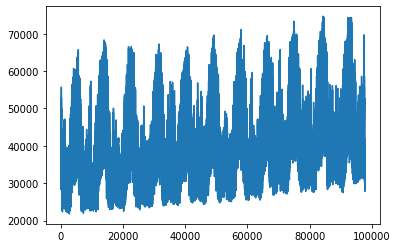

In [7]:
# this is our target variable
energy['MWh'].plot()
# looks like energy variabes between 20K and 70K megawatts.

In [8]:
#checking the missing value
print(energy.isnull().sum())

# dealing with ONE missing value
energy['MWh'] = energy['MWh'].interpolate()
energy.isnull().sum()

Order    0
Date     0
Hour     0
MWh      1
dtype: int64


Order    0
Date     0
Hour     0
MWh      0
dtype: int64

### Partitions

In [9]:
# transforming the index and dropping one column
energy.set_index(energy['Date'], inplace=True)
# drop columns
energy.drop(['Date', 'Order'], axis=1, inplace=True)

print(energy.head)

<bound method NDFrame.head of             Hour           MWh
Date                          
2010-01-01     1  32094.064435
2010-01-01     2  32171.322546
2010-01-01     3  32241.752463
2010-01-01     4  32459.193227
2010-01-01     5  33123.751047
...          ...           ...
2021-02-28    20  40323.958388
2021-02-28    21  39717.792981
2021-02-28    22  38432.480182
2021-02-28    23  36406.502356
2021-03-01     0  34218.320389

[97848 rows x 2 columns]>


**1. Training dataset**

In [10]:
# selecting the range of time and subset the dataset
energy_training = energy.loc['2010-01-01':'2019-12-31']
print(energy_training.info()) # number of rows is 87647 from the year of 2010 to 2019

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87647 entries, 2010-01-01 to 2019-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hour    87647 non-null  int64  
 1   MWh     87647 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 2.0 MB
None


**2. Test dataset**

In [11]:
# selecting the range of time and subset the dataset
# we need to add one more day for feature engineering
energy_test = energy.loc['2019-12-31':'2020-12-31'] 
print(energy_test.info()) # number of rows is 8808

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8808 entries, 2019-12-31 to 2020-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hour    8808 non-null   int64  
 1   MWh     8808 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 206.4 KB
None


## Weather Data

**Reading the data**

In [12]:
weather = pd.read_csv('/content/drive/Shareddrives/Deep Learning Project/RNN Project/Dataset/Raw/Weather.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
weather.head()

,station,valid,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,...,skyl4,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar
0,FST,2010-01-01 00:53,30.02,24.98,81.27,180.00,5.00,M,30.50,1031.80,...,M,M,M,M,M,M,M,M,24.04,METAR KFST 010553Z AUTO 18005KT 10SM CLR M01/M...
1,FST,2010-01-01 01:53,28.04,24.08,84.87,190.00,5.00,M,30.49,1031.30,...,M,M,M,M,M,M,M,M,21.69,METAR KFST 010653Z AUTO 19005KT 10SM CLR M02/M...
2,FST,2010-01-01 02:53,26.96,23.00,84.80,220.00,9.00,M,30.47,1030.90,...,M,M,M,M,M,M,M,M,17.25,METAR KFST 010753Z AUTO 22009KT 10SM CLR M03/M...
3,FST,2010-01-01 03:53,26.96,23.00,84.80,210.00,8.00,M,30.46,1030.40,...,M,M,M,M,M,M,M,M,17.90,METAR KFST 010853Z AUTO 21008KT 10SM CLR M03/M...
4,FST,2010-01-01 04:53,28.04,23.00,81.11,220.00,12.00,M,30.44,1030.00,...,M,M,M,M,M,M,M,M,16.96,METAR KFST 010953Z AUTO 22012KT 10SM CLR M02/M...


**Transforming**

In [14]:
# convert time stamp to datetime for interpolation
weather['valid'] = pd.to_datetime(weather['valid'])
weather.dtypes

station                      object
valid                datetime64[ns]
tmpf                         object
dwpf                         object
relh                         object
drct                         object
sknt                         object
p01i                         object
alti                         object
mslp                         object
vsby                         object
gust                         object
skyc1                        object
skyc2                        object
skyc3                        object
skyc4                        object
skyl1                        object
skyl2                        object
skyl3                        object
skyl4                        object
wxcodes                      object
ice_accretion_1hr            object
ice_accretion_3hr            object
ice_accretion_6hr            object
peak_wind_gust               object
peak_wind_drct               object
peak_wind_time               object
feel                        

In [15]:
# look at the datetime range
print(weather['valid'].min())
print(weather['valid'].max())

2010-01-01 00:53:00
2021-02-19 23:55:00


In [16]:
# set the datetime as the index so you can do interpolation later
weather.set_index(weather['valid'], inplace=True)
weather.head() # see how the valid column is now the index? this will allow
                # you to do resampling to hourly resolution

,station,valid,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,...,skyl4,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar
valid,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:53:00,FST,2010-01-01 00:53:00,30.02,24.98,81.27,180.00,5.00,M,30.50,1031.80,...,M,M,M,M,M,M,M,M,24.04,METAR KFST 010553Z AUTO 18005KT 10SM CLR M01/M...
2010-01-01 01:53:00,FST,2010-01-01 01:53:00,28.04,24.08,84.87,190.00,5.00,M,30.49,1031.30,...,M,M,M,M,M,M,M,M,21.69,METAR KFST 010653Z AUTO 19005KT 10SM CLR M02/M...
2010-01-01 02:53:00,FST,2010-01-01 02:53:00,26.96,23.00,84.80,220.00,9.00,M,30.47,1030.90,...,M,M,M,M,M,M,M,M,17.25,METAR KFST 010753Z AUTO 22009KT 10SM CLR M03/M...
2010-01-01 03:53:00,FST,2010-01-01 03:53:00,26.96,23.00,84.80,210.00,8.00,M,30.46,1030.40,...,M,M,M,M,M,M,M,M,17.90,METAR KFST 010853Z AUTO 21008KT 10SM CLR M03/M...
2010-01-01 04:53:00,FST,2010-01-01 04:53:00,28.04,23.00,81.11,220.00,12.00,M,30.44,1030.00,...,M,M,M,M,M,M,M,M,16.96,METAR KFST 010953Z AUTO 22012KT 10SM CLR M02/M...


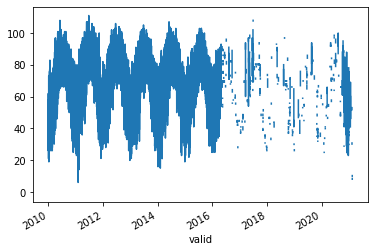

In [17]:
# coerce three variables to numeric 
# tmpf: Air Temperature in Fahrenheit, typically @ 2 meters

weather['tmpf'] = pd.to_numeric(weather['tmpf'], errors='coerce')
weather['tmpf'].plot()

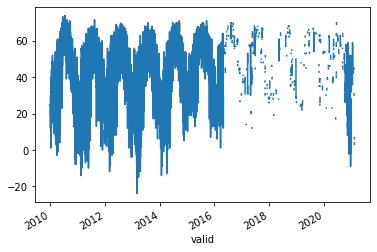

In [18]:
# dwpf: Dew Point Temperature in Fahrenheit, typically @ 2 meters

weather['dwpf'] = pd.to_numeric(weather['dwpf'], errors='coerce')
weather['dwpf'].plot()

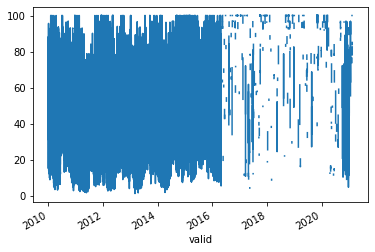

In [19]:
# relh: Relative Humidity in %

weather['relh'] = pd.to_numeric(weather['relh'], errors='coerce')
weather['relh'].plot()

In [20]:
weather.head() # check data

,station,valid,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,...,skyl4,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar
valid,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:53:00,FST,2010-01-01 00:53:00,30.02,24.98,81.27,180.00,5.00,M,30.50,1031.80,...,M,M,M,M,M,M,M,M,24.04,METAR KFST 010553Z AUTO 18005KT 10SM CLR M01/M...
2010-01-01 01:53:00,FST,2010-01-01 01:53:00,28.04,24.08,84.87,190.00,5.00,M,30.49,1031.30,...,M,M,M,M,M,M,M,M,21.69,METAR KFST 010653Z AUTO 19005KT 10SM CLR M02/M...
2010-01-01 02:53:00,FST,2010-01-01 02:53:00,26.96,23.00,84.80,220.00,9.00,M,30.47,1030.90,...,M,M,M,M,M,M,M,M,17.25,METAR KFST 010753Z AUTO 22009KT 10SM CLR M03/M...
2010-01-01 03:53:00,FST,2010-01-01 03:53:00,26.96,23.00,84.80,210.00,8.00,M,30.46,1030.40,...,M,M,M,M,M,M,M,M,17.90,METAR KFST 010853Z AUTO 21008KT 10SM CLR M03/M...
2010-01-01 04:53:00,FST,2010-01-01 04:53:00,28.04,23.00,81.11,220.00,12.00,M,30.44,1030.00,...,M,M,M,M,M,M,M,M,16.96,METAR KFST 010953Z AUTO 22012KT 10SM CLR M02/M...


### Resampling 

In [21]:
# we only focus on the three variables above from the weather dataset
# so generate the new dataset 
# convert it into DataFrame 
# df = pd.DataFrame(weather)
weather.drop(['station','drct', 'p01i', 'gust', 
         'skyc1', 'skyc2', 'skyc3', 'skyc4', 
          'skyl1', 'skyl2', 'skyl3', 'skyl4', 'wxcodes', 
          'ice_accretion_1hr', 'ice_accretion_3hr', 'ice_accretion_6hr', 
          'peak_wind_gust', 'peak_wind_drct', 'peak_wind_time', 'metar', 'feel','vsby', 'sknt','alti','mslp'], axis=1, inplace=True)
weather

,valid,tmpf,dwpf,relh
valid,,,,
2010-01-01 00:53:00,2010-01-01 00:53:00,30.02,24.98,81.27
2010-01-01 01:53:00,2010-01-01 01:53:00,28.04,24.08,84.87
2010-01-01 02:53:00,2010-01-01 02:53:00,26.96,23.00,84.80
2010-01-01 03:53:00,2010-01-01 03:53:00,26.96,23.00,84.80
2010-01-01 04:53:00,2010-01-01 04:53:00,28.04,23.00,81.11
...,...,...,...,...
2021-02-19 23:40:00,2021-02-19 23:40:00,NaN,NaN,NaN
2021-02-19 23:45:00,2021-02-19 23:45:00,NaN,NaN,NaN
2021-02-19 23:50:00,2021-02-19 23:50:00,NaN,NaN,NaN


In [22]:
# Resample dataset using the maximum value hourly
weather = weather.set_index('valid').resample('H').max()
weather

,tmpf,dwpf,relh
valid,,,
2010-01-01 00:00:00,30.02,24.98,81.27
2010-01-01 01:00:00,28.04,24.08,84.87
2010-01-01 02:00:00,26.96,23.00,84.80
2010-01-01 03:00:00,26.96,23.00,84.80
2010-01-01 04:00:00,28.04,23.00,81.11
...,...,...,...
2021-02-19 19:00:00,46.90,35.10,63.33
2021-02-19 20:00:00,44.10,35.10,70.43
2021-02-19 21:00:00,43.00,35.10,73.45


### Cleaning

In [23]:
weather.isnull().sum()
print(weather.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 97632 entries, 2010-01-01 00:00:00 to 2021-02-19 23:00:00
Freq: H
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmpf    95936 non-null  float64
 1   dwpf    95928 non-null  float64
 2   relh    95263 non-null  float64
dtypes: float64(3)
memory usage: 3.0 MB
None


In [24]:
# filling NaN in numeric variables with Linearly Interpolated Value (with .interpolate())
weather['tmpf'] = weather['tmpf'].interpolate()
weather['dwpf'] = weather['dwpf'].interpolate()
weather['relh'] = weather['relh'].interpolate()

Credit: https://www.kaggle.com/code/andreshg/timeseries-analysis-a-complete-guide#3.-Feature-engineering-🔧

In [25]:
weather.isnull().sum() # check 3 variables without missing values
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 97632 entries, 2010-01-01 00:00:00 to 2021-02-19 23:00:00
Freq: H
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmpf    97632 non-null  float64
 1   dwpf    97632 non-null  float64
 2   relh    97632 non-null  float64
dtypes: float64(3)
memory usage: 3.0 MB


### Partitions

**1.   Training dataset**

In [26]:
# selecting the range of time and subset the dataset (we want to rolling average above, so we keep 2010 data now)
weather_training = weather.loc['2010-01-01':'2019-12-31']
print(weather_training.info()) 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87648 entries, 2010-01-01 00:00:00 to 2019-12-31 23:00:00
Freq: H
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmpf    87648 non-null  float64
 1   dwpf    87648 non-null  float64
 2   relh    87648 non-null  float64
dtypes: float64(3)
memory usage: 2.7 MB
None



**2.   Test dataset**

In [27]:
# selecting the range of time and subset the dataset
# need former one day to do the feature engineering 
weather_test = weather.loc['2019-12-31':'2020-12-31']
print(weather_test.info()) # number of rows is 8808

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8808 entries, 2019-12-31 00:00:00 to 2020-12-31 23:00:00
Freq: H
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmpf    8808 non-null   float64
 1   dwpf    8808 non-null   float64
 2   relh    8808 non-null   float64
dtypes: float64(3)
memory usage: 275.2 KB
None


## Merging Datasets

In [28]:
# Reset the index(prepare for merging)
energy_training.reset_index(inplace=True)
energy_test.reset_index(inplace=True)
weather_training.reset_index(inplace=True)
weather_test.reset_index(inplace=True)

**1.   Training dataset**

In [29]:
# merging the training datasets(2011-2019)
training_merging = pd.merge(weather_training, energy_training, left_index=True, right_index=True)
# drop columns
training_merging.drop(['Date', 'Hour'], axis=1, inplace=True)
# rename the time variable
training_merging.rename(columns = {'valid':'Time'}, inplace = True)

training_merging.info() # check data info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87647 entries, 0 to 87646
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    87647 non-null  datetime64[ns]
 1   tmpf    87647 non-null  float64       
 2   dwpf    87647 non-null  float64       
 3   relh    87647 non-null  float64       
 4   MWh     87647 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 4.0 MB


In [30]:
training_merging.head()

,Time,tmpf,dwpf,relh,MWh
0,2010-01-01 00:00:00,30.02,24.98,81.27,32094.064435
1,2010-01-01 01:00:00,28.04,24.08,84.87,32171.322546
2,2010-01-01 02:00:00,26.96,23.00,84.80,32241.752463
3,2010-01-01 03:00:00,26.96,23.00,84.80,32459.193227
4,2010-01-01 04:00:00,28.04,23.00,81.11,33123.751047


In [31]:
# save to the drive
training_merging.to_csv('/content/drive/Shareddrives/Deep Learning Project/RNN Project/Dataset/EDA/Splitting/2010-2019.csv')

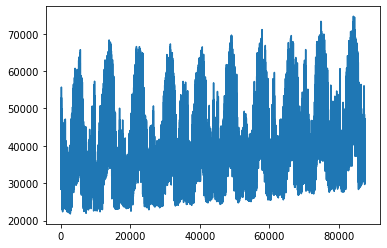

In [32]:
training_merging.MWh.plot()

**2.   Test dataset**

In [33]:
# merging the test datasets(2020)
test_merging = pd.merge(weather_test, energy_test, left_index=True, right_index=True)
# drop columns
test_merging.drop(['Date', 'Hour'], axis=1, inplace=True)
# rename the time variable
test_merging.rename(columns = {'valid':'Time'}, inplace = True)

test_merging.info() # check data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8808 entries, 0 to 8807
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    8808 non-null   datetime64[ns]
 1   tmpf    8808 non-null   float64       
 2   dwpf    8808 non-null   float64       
 3   relh    8808 non-null   float64       
 4   MWh     8808 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 344.2 KB


In [34]:
test_merging.head()

,Time,tmpf,dwpf,relh,MWh
0,2019-12-31 00:00:00,34.0,17.1,49.55,40282.680017
1,2019-12-31 01:00:00,30.9,17.1,56.14,39222.050718
2,2019-12-31 02:00:00,33.1,16.0,48.98,38863.568212
3,2019-12-31 03:00:00,30.0,17.1,58.23,38870.553417
4,2019-12-31 04:00:00,32.0,15.1,49.23,39410.655163


In [35]:
# save to the drive
test_merging.to_csv('/content/drive/Shareddrives/Deep Learning Project/RNN Project/Dataset/EDA/Splitting/2020.csv')

In [36]:
test_merging.head()

,Time,tmpf,dwpf,relh,MWh
0,2019-12-31 00:00:00,34.0,17.1,49.55,40282.680017
1,2019-12-31 01:00:00,30.9,17.1,56.14,39222.050718
2,2019-12-31 02:00:00,33.1,16.0,48.98,38863.568212
3,2019-12-31 03:00:00,30.0,17.1,58.23,38870.553417
4,2019-12-31 04:00:00,32.0,15.1,49.23,39410.655163


# Feature engineering

The variables we created are 

*  'Year' (for EDA, would drop in model)
*  'quarter' 
*  'month'
*  'day'
*  'hour'
*  'day of week' (Monday is zero, Sunday is 6)
*  'season' (for EDA, would drop in model)





## Training Dataset

### Basic features 

In [37]:
# adding basic timing/calender features 
training_merging['year']=training_merging['Time'].dt.year  # based on Year
training_merging['quarter'] = training_merging['Time'].dt.quarter # based on Quarter
training_merging['month']=training_merging['Time'].dt.month  # based on Month
training_merging['day']=training_merging['Time'].dt.day # based on Day
training_merging['hour'] = training_merging['Time'].dt.hour # based on Hour
training_merging['day of week'] = training_merging['Time'].dt.dayofweek # based on Day of Week
                                                                        # Monday is 0, Sunday is 6
training_merging['season'] = training_merging['month'] % 12 // 3 + 1 # Winter is 1, Spring is 2, Summer is 3, Fall is 4

In [38]:
training_merging.head() # check data

,Time,tmpf,dwpf,relh,MWh,year,quarter,month,day,hour,day of week,season
0,2010-01-01 00:00:00,30.02,24.98,81.27,32094.064435,2010,1,1,1,0,4,1
1,2010-01-01 01:00:00,28.04,24.08,84.87,32171.322546,2010,1,1,1,1,4,1
2,2010-01-01 02:00:00,26.96,23.00,84.80,32241.752463,2010,1,1,1,2,4,1
3,2010-01-01 03:00:00,26.96,23.00,84.80,32459.193227,2010,1,1,1,3,4,1
4,2010-01-01 04:00:00,28.04,23.00,81.11,33123.751047,2010,1,1,1,4,4,1


In [39]:
training_merging.isna().sum() # check missing values

Time           0
tmpf           0
dwpf           0
relh           0
MWh            0
year           0
quarter        0
month          0
day            0
hour           0
day of week    0
season         0
dtype: int64

Credit: https://www.analyticsvidhya.com/blog/2019/12/6-powerful-feature-engineering-techniques-time-series/

### External data

* Both external data are from EIA website:
https://www.eia.gov/totalenergy/data/monthly/#consumption
* The first one is the dataset of Texas natual gas price sold to electric power consumers. https://www.eia.gov/dnav/ng/hist/n3045tx3m.htm
* The second one is one of the datasets of US total energy (The total primary energy consumed by the electric power sector) consumed by the the electric power sector. Which is the sum of the commercial sector consumption values for fossil fuels and renewable energy.

https://www.eia.gov/totalenergy/data/browser/xls.php?tbl=T02.06&freq=m;   


Since both datasets are split up based on the data and months, and we have done similar pre-processing steps for the weathers and demand merged data as well we will merge the prices and energy external datasets based on the year and the subsequent month. 

In [40]:
price = pd.read_csv('/content/drive/Shareddrives/Deep Learning Project/RNN Project/Dataset/Gas price sold to electric power.csv') 
price.columns= price.columns.str.lower() # change to lower case
price.head() # raw demand dataset looks like

,year,month,gas price sold to electic power
0,2011,1,4.51
1,2011,2,4.75
2,2011,3,4.22
3,2011,4,4.53
4,2011,5,4.56


In [41]:
training_merging = pd.merge(training_merging, price, how="left", on=["year","month"]) # join external data

In [42]:
energe = pd.read_csv('/content/drive/Shareddrives/Deep Learning Project/RNN Project/Dataset/US total energy.csv') 
energe.columns= energe.columns.str.lower() # change to lower case
energe.head() # raw demand dataset looks like

,year,month,us energy consumed by the electric
0,2011,1,3475.911
1,2011,2,3004.941
2,2011,3,3068.039
3,2011,4,2894.316
4,2011,5,3110.114


In [43]:
training_merging = pd.merge(training_merging, energe, how="left", on=["year","month"]) # join external data

In [44]:
training_merging.head() # check data

,Time,tmpf,dwpf,relh,MWh,year,quarter,month,day,hour,day of week,season,gas price sold to electic power,us energy consumed by the electric
0,2010-01-01 00:00:00,30.02,24.98,81.27,32094.064435,2010,1,1,1,0,4,1,NaN,NaN
1,2010-01-01 01:00:00,28.04,24.08,84.87,32171.322546,2010,1,1,1,1,4,1,NaN,NaN
2,2010-01-01 02:00:00,26.96,23.00,84.80,32241.752463,2010,1,1,1,2,4,1,NaN,NaN
3,2010-01-01 03:00:00,26.96,23.00,84.80,32459.193227,2010,1,1,1,3,4,1,NaN,NaN
4,2010-01-01 04:00:00,28.04,23.00,81.11,33123.751047,2010,1,1,1,4,4,1,NaN,NaN


### Intertesting features

*   **Working Hour Range**

  Cloumn Name: 'is_working_hour'

  Definition: We set 8am to 10pm would be the working hour range.


In [45]:
# changing time to timestamp format
training_merging['Time'] = training_merging['Time'].apply(lambda x: pd.Timestamp(x))
training_merging['is_working_hour'] = False
# another hour (will be dropped)
training_merging['Hour_D']=training_merging['Time'].apply(lambda x: x.hour)
training_merging.loc[((training_merging['Hour_D'] >= 8) & (training_merging['Hour_D'] < 22)), 'is_working_hour'] = True
                          # we set 8am to 10pm would be the working our range
training_merging.drop(['Hour_D'], axis=1, inplace=True)

#training_merging['is_working_hour'].replace({'False': 0, 'True': }, inplace=True)
training_merging['is_working_hour'] = training_merging['is_working_hour'].replace({True: 1, False: 0})

In [46]:
training_merging.head()

,Time,tmpf,dwpf,relh,MWh,year,quarter,month,day,hour,day of week,season,gas price sold to electic power,us energy consumed by the electric,is_working_hour
0,2010-01-01 00:00:00,30.02,24.98,81.27,32094.064435,2010,1,1,1,0,4,1,NaN,NaN,0
1,2010-01-01 01:00:00,28.04,24.08,84.87,32171.322546,2010,1,1,1,1,4,1,NaN,NaN,0
2,2010-01-01 02:00:00,26.96,23.00,84.80,32241.752463,2010,1,1,1,2,4,1,NaN,NaN,0
3,2010-01-01 03:00:00,26.96,23.00,84.80,32459.193227,2010,1,1,1,3,4,1,NaN,NaN,0
4,2010-01-01 04:00:00,28.04,23.00,81.11,33123.751047,2010,1,1,1,4,4,1,NaN,NaN,0


*   **The Leap Year**

  Cloumn Name: 'is_leap_year'

  Definition: Checking the datetime is in the leap year or not.

In [47]:
# based on the leap_year
training_merging['is_leap_year'] = training_merging['Time'].apply(lambda x: x.is_leap_year)
training_merging['is_leap_year'] = training_merging['is_leap_year'].replace({True: 1, False: 0})

*   **Weather's Features Per Day**  

  **(will have 24 blank fields since the layback)**
  

  1.  Air Temperature per day (about tmpf) 

      Cloumn Name: 'Air Temperature/Day'


  2.  Dew Point Temperature per day (about dwpf)

      Cloumn Name: 'Dew Point Temperature/Day'

  3. Relative Humidity per day (about relh)
        
      Cloumn Name: 'Relative Humidity/Day'


In [48]:
# Air Temperature per day (about tmpf) 
training_merging['Air Temperature/Day'] = training_merging['tmpf'].shift(1*24)

# Dew Point Temperature per day (about dwpf)
training_merging['Dew Point Temperature/Day'] = training_merging['dwpf'].shift(1*24)

# Relative Humidity per day (about relh)
training_merging['Relative Humidity/Day'] = training_merging['relh'].shift(1*24)

training_merging.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87647 entries, 0 to 87646
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Time                                87647 non-null  datetime64[ns]
 1   tmpf                                87647 non-null  float64       
 2   dwpf                                87647 non-null  float64       
 3   relh                                87647 non-null  float64       
 4   MWh                                 87647 non-null  float64       
 5   year                                87647 non-null  int64         
 6   quarter                             87647 non-null  int64         
 7   month                               87647 non-null  int64         
 8   day                                 87647 non-null  int64         
 9   hour                                87647 non-null  int64         
 10  day of week           

In [49]:
#for EDA 
train_eda = training_merging
train_eda = train_eda.dropna()
train_eda

,Time,tmpf,dwpf,relh,MWh,year,quarter,month,day,hour,day of week,season,gas price sold to electic power,us energy consumed by the electric,is_working_hour,is_leap_year,Air Temperature/Day,Dew Point Temperature/Day,Relative Humidity/Day
8760,2011-01-01 00:00:00,32.00,17.96,55.72,27662.443480,2011,1,1,1,0,5,1,4.51,3475.911,0,0,51.80,33.80,56.01
8761,2011-01-01 01:00:00,33.08,19.04,55.89,27250.044715,2011,1,1,1,1,5,1,4.51,3475.911,0,0,42.98,30.92,62.16
8762,2011-01-01 02:00:00,33.08,17.96,53.36,26783.226081,2011,1,1,1,2,5,1,4.51,3475.911,0,0,41.00,28.94,61.89
8763,2011-01-01 03:00:00,32.00,19.04,58.37,26676.468490,2011,1,1,1,3,5,1,4.51,3475.911,0,0,37.94,26.96,64.29
8764,2011-01-01 04:00:00,30.02,19.04,63.24,26868.802537,2011,1,1,1,4,5,1,4.51,3475.911,0,0,37.94,28.04,67.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87642,2019-12-31 18:00:00,51.10,27.00,38.99,41812.983857,2019,4,12,31,18,1,1,2.11,3006.128,1,0,46.00,15.10,28.49
87643,2019-12-31 19:00:00,50.00,27.00,40.62,41079.759161,2019,4,12,31,19,1,1,2.11,3006.128,1,0,41.00,15.10,34.50
87644,2019-12-31 20:00:00,46.90,32.00,55.94,40145.543121,2019,4,12,31,20,1,1,2.11,3006.128,1,0,39.90,16.00,37.44
87645,2019-12-31 21:00:00,45.00,33.10,62.83,39330.601248,2019,4,12,31,21,1,1,2.11,3006.128,1,0,37.90,16.00,40.49


In [50]:
training_merging.set_index(training_merging['Time'], inplace=True)
# selecting the range of time and subset the dataset
training_EDA = training_merging.loc['2011-01-01':'2019-12-31']
print(training_EDA.info()) 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 78887 entries, 2011-01-01 00:00:00 to 2019-12-31 22:00:00
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Time                                78887 non-null  datetime64[ns]
 1   tmpf                                78887 non-null  float64       
 2   dwpf                                78887 non-null  float64       
 3   relh                                78887 non-null  float64       
 4   MWh                                 78887 non-null  float64       
 5   year                                78887 non-null  int64         
 6   quarter                             78887 non-null  int64         
 7   month                               78887 non-null  int64         
 8   day                                 78887 non-null  int64         
 9   hour                                78887 non-null  int64  

In [51]:
training_EDA.head()

,Time,tmpf,dwpf,relh,MWh,year,quarter,month,day,hour,day of week,season,gas price sold to electic power,us energy consumed by the electric,is_working_hour,is_leap_year,Air Temperature/Day,Dew Point Temperature/Day,Relative Humidity/Day
Time,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,32.00,17.96,55.72,27662.443480,2011,1,1,1,0,5,1,4.51,3475.911,0,0,51.80,33.80,56.01
2011-01-01 01:00:00,2011-01-01 01:00:00,33.08,19.04,55.89,27250.044715,2011,1,1,1,1,5,1,4.51,3475.911,0,0,42.98,30.92,62.16
2011-01-01 02:00:00,2011-01-01 02:00:00,33.08,17.96,53.36,26783.226081,2011,1,1,1,2,5,1,4.51,3475.911,0,0,41.00,28.94,61.89
2011-01-01 03:00:00,2011-01-01 03:00:00,32.00,19.04,58.37,26676.468490,2011,1,1,1,3,5,1,4.51,3475.911,0,0,37.94,26.96,64.29
2011-01-01 04:00:00,2011-01-01 04:00:00,30.02,19.04,63.24,26868.802537,2011,1,1,1,4,5,1,4.51,3475.911,0,0,37.94,28.04,67.21


In [52]:
# save to the drive -EDA dataset
training_EDA.to_csv('/content/drive/Shareddrives/Deep Learning Project/RNN Project/Dataset/EDA/EDA(2011-2019).csv')

In [53]:
# reset the index then drop some columns for modeling 
training = training_EDA

training.drop(['Time','season', 'year' ], axis=1, inplace=True)

training.reset_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [54]:
training.head()

,Time,tmpf,dwpf,relh,MWh,quarter,month,day,hour,day of week,gas price sold to electic power,us energy consumed by the electric,is_working_hour,is_leap_year,Air Temperature/Day,Dew Point Temperature/Day,Relative Humidity/Day
0,2011-01-01 00:00:00,32.00,17.96,55.72,27662.443480,1,1,1,0,5,4.51,3475.911,0,0,51.80,33.80,56.01
1,2011-01-01 01:00:00,33.08,19.04,55.89,27250.044715,1,1,1,1,5,4.51,3475.911,0,0,42.98,30.92,62.16
2,2011-01-01 02:00:00,33.08,17.96,53.36,26783.226081,1,1,1,2,5,4.51,3475.911,0,0,41.00,28.94,61.89
3,2011-01-01 03:00:00,32.00,19.04,58.37,26676.468490,1,1,1,3,5,4.51,3475.911,0,0,37.94,26.96,64.29
4,2011-01-01 04:00:00,30.02,19.04,63.24,26868.802537,1,1,1,4,5,4.51,3475.911,0,0,37.94,28.04,67.21


## For Test Dataset

### Basic features 

In [55]:
# adding basic timing features 
test_merging['year']=test_merging['Time'].dt.year  # based on Year
test_merging['quarter'] = test_merging['Time'].dt.quarter # based on Quarter
test_merging['month']=test_merging['Time'].dt.month  # based on Month
test_merging['day']=test_merging['Time'].dt.day # based on Day
test_merging['hour'] = test_merging['Time'].dt.hour # based on Hour
test_merging['day of week'] = test_merging['Time'].dt.dayofweek # based on Day of Week
                                                                        # Monday is 0, Sunday is 6
test_merging['season'] = test_merging['month'] % 12 // 3 + 1 # Winter is 1, Spring is 2, Summer is 3, Fall is 4

In [56]:
test_merging.head()

,Time,tmpf,dwpf,relh,MWh,year,quarter,month,day,hour,day of week,season
0,2019-12-31 00:00:00,34.0,17.1,49.55,40282.680017,2019,4,12,31,0,1,1
1,2019-12-31 01:00:00,30.9,17.1,56.14,39222.050718,2019,4,12,31,1,1,1
2,2019-12-31 02:00:00,33.1,16.0,48.98,38863.568212,2019,4,12,31,2,1,1
3,2019-12-31 03:00:00,30.0,17.1,58.23,38870.553417,2019,4,12,31,3,1,1
4,2019-12-31 04:00:00,32.0,15.1,49.23,39410.655163,2019,4,12,31,4,1,1


### Merge External data for test data

In [57]:
test_merging = pd.merge(test_merging, price, how="left", on=["year","month"]) # join external data

In [58]:
test_merging = pd.merge(test_merging, energe, how="left", on=["year","month"]) # join external data

### Intertesting features

*   **Working Hour Range**

  Cloumn Name: 'is_working_hour'

  Definition: We set 8am to 10pm would be the working our range.

In [59]:
# changing time to timestamp format
test_merging['Time'] = test_merging['Time'].apply(lambda x: pd.Timestamp(x))
test_merging['is_working_hour'] = False
# another hour (will be dropped)
test_merging['Hour_D']=test_merging['Time'].apply(lambda x: x.hour)
test_merging.loc[((test_merging['Hour_D'] >= 8) & (test_merging['Hour_D'] < 22)), 'is_working_hour'] = True
                          # we set 8am to 10pm would be the working our range
test_merging.drop(['Hour_D'], axis=1, inplace=True)

#training_merging['is_working_hour'].replace({'False': 0, 'True': }, inplace=True)
test_merging['is_working_hour'] = test_merging['is_working_hour'].replace({True: 1, False: 0})

*   **The Leap Year**

  Cloumn Name: 'is_leap_year'

  Definition: Checking the datetime is in the leap year or not.

In [60]:
# based on the leap_year
test_merging['is_leap_year'] = test_merging['Time'].apply(lambda x: x.is_leap_year)

test_merging['is_leap_year'] = test_merging['is_leap_year'].replace({True: 1, False: 0})

*   **Weather's Features Per Day**  

  **(will have 24 blank fields since the layback)**
  

  1.  Air Temperature per day (about tmpf) 

      Cloumn Name: 'Air Temperature/Day'


  2.  Dew Point Temperature per day (about dwpf)

      Cloumn Name: 'Dew Point Temperature/Day'


  3. Relative Humidity per day (about relh)
        
      Cloumn Name: 'Relative Humidity/Day'


In [61]:
# Air Temperature per day (about tmpf) 
test_merging['Air Temperature/Day'] = test_merging['tmpf'].shift(1*24)

# Dew Point Temperature per day (about dwpf)
test_merging['Dew Point Temperature/Day'] = test_merging['dwpf'].shift(1*24)

# Relative Humidity per day (about relh)
test_merging['Relative Humidity/Day'] = test_merging['relh'].shift(1*24)

test_merging.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8808 entries, 0 to 8807
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Time                                8808 non-null   datetime64[ns]
 1   tmpf                                8808 non-null   float64       
 2   dwpf                                8808 non-null   float64       
 3   relh                                8808 non-null   float64       
 4   MWh                                 8808 non-null   float64       
 5   year                                8808 non-null   int64         
 6   quarter                             8808 non-null   int64         
 7   month                               8808 non-null   int64         
 8   day                                 8808 non-null   int64         
 9   hour                                8808 non-null   int64         
 10  day of week             

In [62]:
#prepare split for EDA
test_eda = test_merging
test_eda.dropna()
test_eda.head()

,Time,tmpf,dwpf,relh,MWh,year,quarter,month,day,hour,day of week,season,gas price sold to electic power,us energy consumed by the electric,is_working_hour,is_leap_year,Air Temperature/Day,Dew Point Temperature/Day,Relative Humidity/Day
0,2019-12-31 00:00:00,34.0,17.1,49.55,40282.680017,2019,4,12,31,0,1,1,2.11,3006.128,0,0,NaN,NaN,NaN
1,2019-12-31 01:00:00,30.9,17.1,56.14,39222.050718,2019,4,12,31,1,1,1,2.11,3006.128,0,0,NaN,NaN,NaN
2,2019-12-31 02:00:00,33.1,16.0,48.98,38863.568212,2019,4,12,31,2,1,1,2.11,3006.128,0,0,NaN,NaN,NaN
3,2019-12-31 03:00:00,30.0,17.1,58.23,38870.553417,2019,4,12,31,3,1,1,2.11,3006.128,0,0,NaN,NaN,NaN
4,2019-12-31 04:00:00,32.0,15.1,49.23,39410.655163,2019,4,12,31,4,1,1,2.11,3006.128,0,0,NaN,NaN,NaN


In [63]:
test_merging.set_index(test_merging['Time'], inplace=True)
# selecting the range of time and subset the dataset
test_EDA = test_merging.loc['2020-01-01':'2020-12-31']
print(test_EDA.info()) 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2020-01-01 00:00:00 to 2020-12-31 23:00:00
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Time                                8784 non-null   datetime64[ns]
 1   tmpf                                8784 non-null   float64       
 2   dwpf                                8784 non-null   float64       
 3   relh                                8784 non-null   float64       
 4   MWh                                 8784 non-null   float64       
 5   year                                8784 non-null   int64         
 6   quarter                             8784 non-null   int64         
 7   month                               8784 non-null   int64         
 8   day                                 8784 non-null   int64         
 9   hour                                8784 non-null   int64   

In [64]:
test_EDA

,Time,tmpf,dwpf,relh,MWh,year,quarter,month,day,hour,day of week,season,gas price sold to electic power,us energy consumed by the electric,is_working_hour,is_leap_year,Air Temperature/Day,Dew Point Temperature/Day,Relative Humidity/Day
Time,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,2020-01-01 00:00:00,41.0,30.9,67.03,37460.838975,2020,1,1,1,0,2,1,1.96,3025.031,0,1,34.0,17.1,49.55
2020-01-01 01:00:00,2020-01-01 01:00:00,41.0,30.9,67.03,36824.115099,2020,1,1,1,1,2,1,1.96,3025.031,0,1,30.9,17.1,56.14
2020-01-01 02:00:00,2020-01-01 02:00:00,39.0,30.9,72.45,36531.366488,2020,1,1,1,2,2,1,1.96,3025.031,0,1,33.1,16.0,48.98
2020-01-01 03:00:00,2020-01-01 03:00:00,39.0,30.0,69.85,36072.165020,2020,1,1,1,3,2,1,1.96,3025.031,0,1,30.0,17.1,58.23
2020-01-01 04:00:00,2020-01-01 04:00:00,37.9,30.0,72.93,35836.161867,2020,1,1,1,4,2,1,1.96,3025.031,0,1,32.0,15.1,49.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,2020-12-31 19:00:00,32.0,27.0,81.55,50480.019624,2020,4,12,31,19,3,1,2.82,3058.150,1,1,32.0,30.9,95.65
2020-12-31 20:00:00,2020-12-31 20:00:00,30.9,26.1,82.15,49349.203353,2020,4,12,31,20,3,1,2.82,3058.150,1,1,32.0,30.9,95.65
2020-12-31 21:00:00,2020-12-31 21:00:00,28.0,21.9,77.57,47980.656897,2020,4,12,31,21,3,1,2.82,3058.150,1,1,32.0,32.0,100.00


In [65]:
# save to the drive -EDA dataset
test_EDA.to_csv('/content/drive/Shareddrives/Deep Learning Project/RNN Project/Dataset/EDA/EDA(2020).csv')

In [66]:
# reset the index then drop some columns for modeling 
test = test_EDA
test.drop(['Time','season', 'year' ], axis=1, inplace=True)

test.reset_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [67]:
test_EDA.head() # check data for EDA

,Time,tmpf,dwpf,relh,MWh,quarter,month,day,hour,day of week,gas price sold to electic power,us energy consumed by the electric,is_working_hour,is_leap_year,Air Temperature/Day,Dew Point Temperature/Day,Relative Humidity/Day
0,2020-01-01 00:00:00,41.0,30.9,67.03,37460.838975,1,1,1,0,2,1.96,3025.031,0,1,34.0,17.1,49.55
1,2020-01-01 01:00:00,41.0,30.9,67.03,36824.115099,1,1,1,1,2,1.96,3025.031,0,1,30.9,17.1,56.14
2,2020-01-01 02:00:00,39.0,30.9,72.45,36531.366488,1,1,1,2,2,1.96,3025.031,0,1,33.1,16.0,48.98
3,2020-01-01 03:00:00,39.0,30.0,69.85,36072.165020,1,1,1,3,2,1.96,3025.031,0,1,30.0,17.1,58.23
4,2020-01-01 04:00:00,37.9,30.0,72.93,35836.161867,1,1,1,4,2,1.96,3025.031,0,1,32.0,15.1,49.23


# Final Datasets

In [68]:
# save FINAL clean Dataset to the drive

# training (drop time, and binary columns)
training.drop(['Time', 'is_working_hour', 'is_leap_year'], axis=1, inplace=True)
training.to_csv('/content/drive/Shareddrives/Deep Learning Project/RNN Project/Dataset/Modeling/Modeling(2011-2019).csv')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [69]:
# test (drop time, and binary columns)
test.drop(['Time', 'is_working_hour', 'is_leap_year'], axis=1, inplace=True)
test.to_csv('/content/drive/Shareddrives/Deep Learning Project/RNN Project/Dataset/Modeling/Modeling(2020).csv')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#Exploratory Data Analysis

In [70]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
#concat test_eda and train_eda
frame = [train_eda, test_eda]
df = pd.concat(frame)
df = df.dropna()
df = df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87671 entries, 0 to 87670
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   index                               87671 non-null  object        
 1   Time                                87671 non-null  datetime64[ns]
 2   tmpf                                87671 non-null  float64       
 3   dwpf                                87671 non-null  float64       
 4   relh                                87671 non-null  float64       
 5   MWh                                 87671 non-null  float64       
 6   year                                87671 non-null  int64         
 7   quarter                             87671 non-null  int64         
 8   month                               87671 non-null  int64         
 9   day                                 87671 non-null  int64         
 10  hour                  

In [72]:
df.head()

,index,Time,tmpf,dwpf,relh,MWh,year,quarter,month,day,hour,day of week,season,gas price sold to electic power,us energy consumed by the electric,is_working_hour,is_leap_year,Air Temperature/Day,Dew Point Temperature/Day,Relative Humidity/Day
0,8760,2011-01-01 00:00:00,32.00,17.96,55.72,27662.443480,2011,1,1,1,0,5,1,4.51,3475.911,0,0,51.80,33.80,56.01
1,8761,2011-01-01 01:00:00,33.08,19.04,55.89,27250.044715,2011,1,1,1,1,5,1,4.51,3475.911,0,0,42.98,30.92,62.16
2,8762,2011-01-01 02:00:00,33.08,17.96,53.36,26783.226081,2011,1,1,1,2,5,1,4.51,3475.911,0,0,41.00,28.94,61.89
3,8763,2011-01-01 03:00:00,32.00,19.04,58.37,26676.468490,2011,1,1,1,3,5,1,4.51,3475.911,0,0,37.94,26.96,64.29
4,8764,2011-01-01 04:00:00,30.02,19.04,63.24,26868.802537,2011,1,1,1,4,5,1,4.51,3475.911,0,0,37.94,28.04,67.21


In [73]:
df.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,index,Time,tmpf,dwpf,relh,MWh,year,quarter,month,day,hour,day of week,season,gas price sold to electic power,us energy consumed by the electric,is_working_hour,is_leap_year,Air Temperature/Day,Dew Point Temperature/Day,Relative Humidity/Day
count,87671.0,87671,87671.000000,87671.000000,87671.000000,87671.000000,87671.000000,87671.000000,87671.000000,87671.000000,87671.000000,87671.000000,87671.000000,87671.000000,87671.000000,87671.000000,87671.000000,87671.000000,87671.000000,87671.000000
unique,87671.0,87671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,8760.0,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,67.054044,42.145532,47.563245,40251.147030,2015.500371,2.508332,6.522248,15.731279,11.499869,2.999749,2.502891,3.240935,3153.317514,0.583340,0.300578,67.057354,42.144284,47.551403
std,NaN,NaN,17.470774,16.640562,24.320258,9624.919654,2.872671,1.117147,3.448863,8.800808,6.922157,2.000217,1.114721,0.878904,330.923473,0.493008,0.458512,17.464967,16.641988,24.309655
min,NaN,NaN,-0.900000,-23.980000,1.190000,22366.014254,2011.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.760000,2467.077000,0.000000,0.000000,-0.900000,-23.980000,1.190000
25%,NaN,NaN,54.000000,28.900000,27.890000,33421.187907,2013.000000,2.000000,4.000000,8.000000,5.500000,1.000000,2.000000,2.620000,2915.913000,0.000000,0.000000,54.000000,28.900000,27.890000


**Partitioning of the data for various graphs.**

In [74]:
df_new=df[['tmpf','dwpf','relh','MWh','gas price sold to electic power','us energy consumed by the electric']]

p1 = df.groupby(['year']).mean() #Grouped by year and did an average  
p1.reset_index(inplace=True)

df_min_max_scaled = df_new.copy()

# apply normalization techniques
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = df_min_max_scaled[column]  / df_min_max_scaled[column].abs().max()
    
p2 = df_min_max_scaled
p2 = p2[['tmpf','dwpf','relh','MWh','gas price sold to electic power','us energy consumed by the electric']]
p2

p3 = df.groupby(["is_working_hour"]).mean()
p3.reset_index(inplace=True)

* The data frame is wrangled after the feature engineering so that reasonable plots can be generated to give insights into the data.  

* Used a min-max scale to normalize the data so that the variables can be compared on the same scale and inferences can be drawn from the data.     

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc04c261b10>,
      dtype=object)

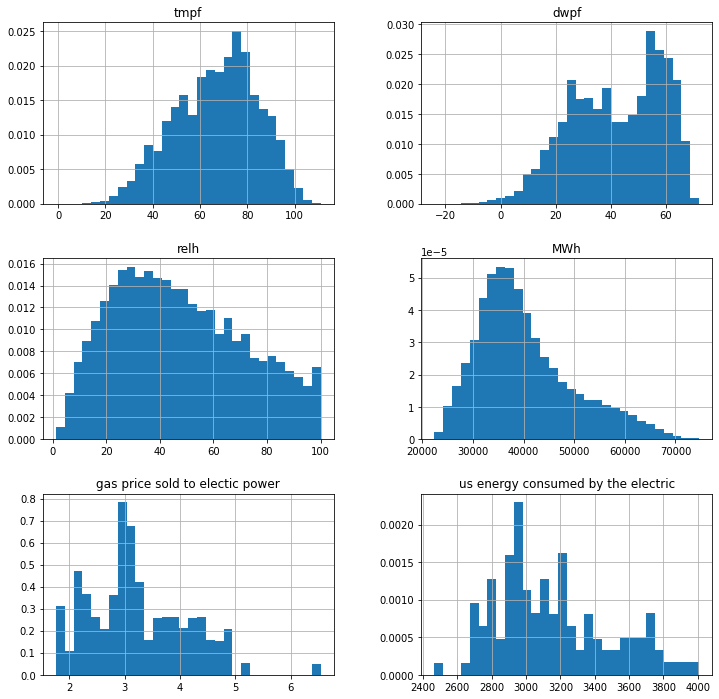

In [76]:
distribution = df_new
distribution.hist(bins=30, figsize=(12,12), density=True)

In [77]:
p2.head()

,tmpf,dwpf,relh,MWh,gas price sold to electic power,us energy consumed by the electric
0,0.288236,0.249444,0.5572,0.370485,0.689602,0.867362
1,0.297964,0.264444,0.5589,0.364961,0.689602,0.867362
2,0.297964,0.249444,0.5336,0.358709,0.689602,0.867362
3,0.288236,0.264444,0.5837,0.357279,0.689602,0.867362
4,0.270402,0.264444,0.6324,0.359855,0.689602,0.867362


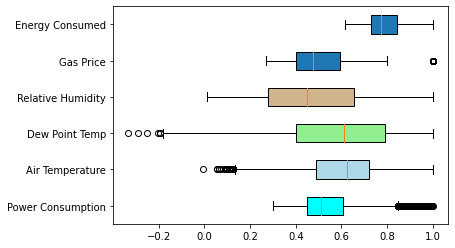

In [78]:
box_plot_data=[p2['MWh'], p2['tmpf'], p2['dwpf'], p2['relh'], p2['gas price sold to electic power'], p2['us energy consumed by the electric']]
box=plt.boxplot(box_plot_data,vert=0,patch_artist=True,labels=['Power Consumption','Air Temperature','Dew Point Temp', 'Relative Humidity', 'Gas Price' , 'Energy Consumed'],
            )
 
colors = ['cyan', 'lightblue', 'lightgreen', 'tan']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
 
plt.show()

* From the above distributions, we can say that the variables are distributed appropriately and can be approximated to normal distribution. 

* The target variable can be approximated as normal distribution but slightly skewed towards the right.

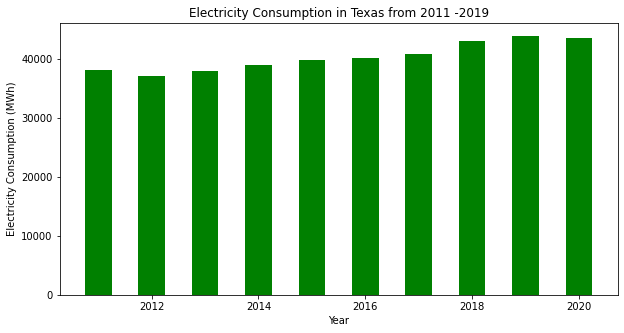

In [79]:
years = p1['year']
values = p1['MWh']

fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(years, values, color ='green', width = 0.5)
plt.xlabel("Year")
plt.ylabel("Electricity Consumption (MWh)")
plt.title("Electricity Consumption in Texas from 2011 -2019")
plt.show()

* The above graph shows the distribution of Energy consumption when grouped by years. We can see a slowly increasing trend in energy consumption—2019 with the highest and 2012 being the least.

In [80]:
df['MWh'].describe()

count    87671.000000
mean     40251.147030
std       9624.919654
min      22366.014254
25%      33421.187907
50%      38149.880295
75%      45319.218499
max      74665.579486
Name: MWh, dtype: float64

* The values describe about the distribution of the data with different quartiles the minimum and the maxium value of the target variable

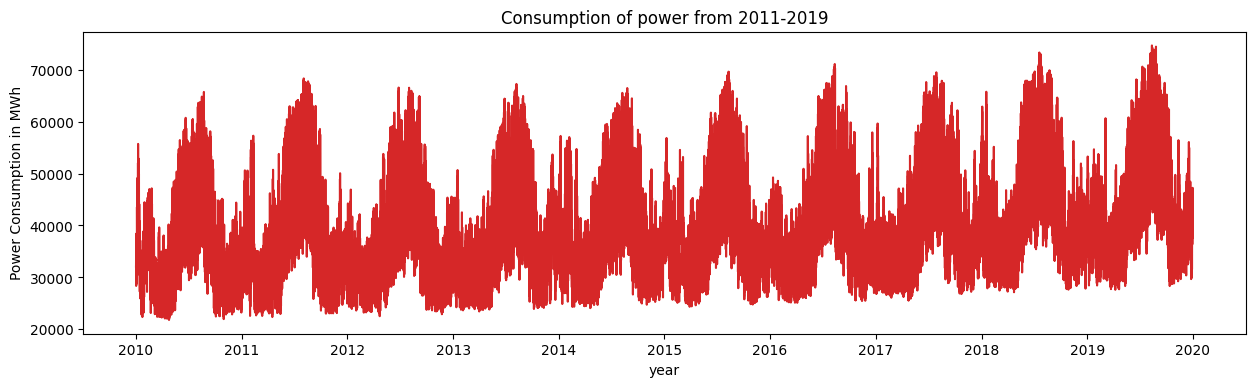

In [81]:
def plot_df(training_merging, x, y, title="", xlabel='year', ylabel='Power Consumption in MWh', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(training_merging, x=training_merging['Time'], y=training_merging['MWh'], title='Consumption of power from 2011-2019')

* From plot 1, 'Electricity Consumption in Texas from 2011 -2020', we can state an increase in power consumption yearly. 

* From plot 2, we can see a trend and seasonality in the data distribution, which is perfectly good for modeling.    

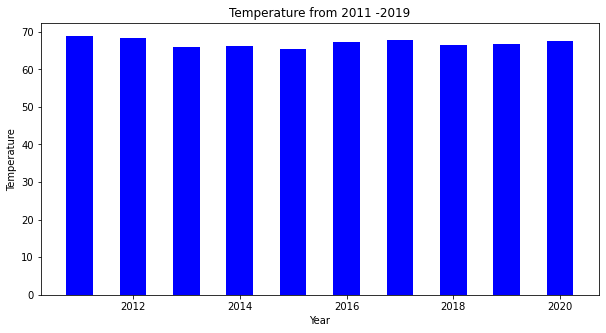

In [82]:
years = p1['year']
values = p1['tmpf']
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(years, values, color ='blue',
        width = 0.5)
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.title("Temperature from 2011 -2020")
plt.show()

* The above graph shows the temperature distribution grouped by the year and corresponding mean temperature. We can say that the mostly the temperature values are close by we can see a slight increase trend.

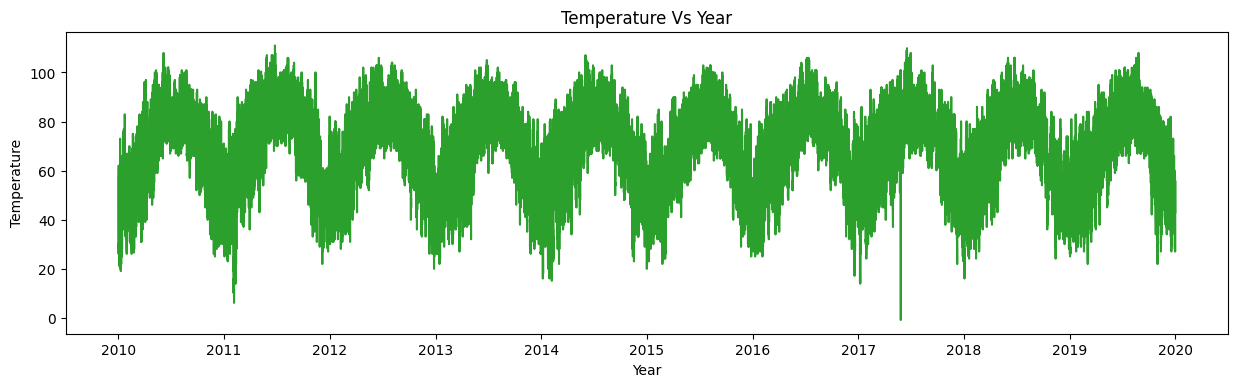

In [83]:
def plot_df(training_merging, x, y, title="Temperature Vs Year", xlabel='Year', ylabel='Temperature', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:green')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(training_merging, x=training_merging['Time'], y=training_merging['tmpf'], title='Temperature Vs Year')

* From the above graphs, we can say that there is a good trend and seasonality cycle to the time, so the variable temperature is a good predictor for the time series model as we can see a pattern in the graph where there are spikes in between the years and low at the beginning and the end of the year the same pattern is followed till 2020. 


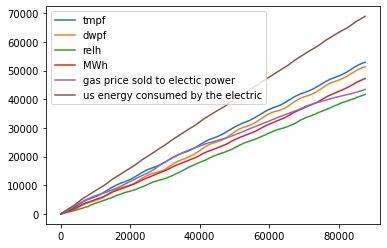

In [84]:
p2 = p2.cumsum()
p2.plot();

* The above graph describes all the variables in the data with cumulative values, and we can see that all the variables have an increasing trend. The relation between the variables can further be described with the help of the correlation plot below.

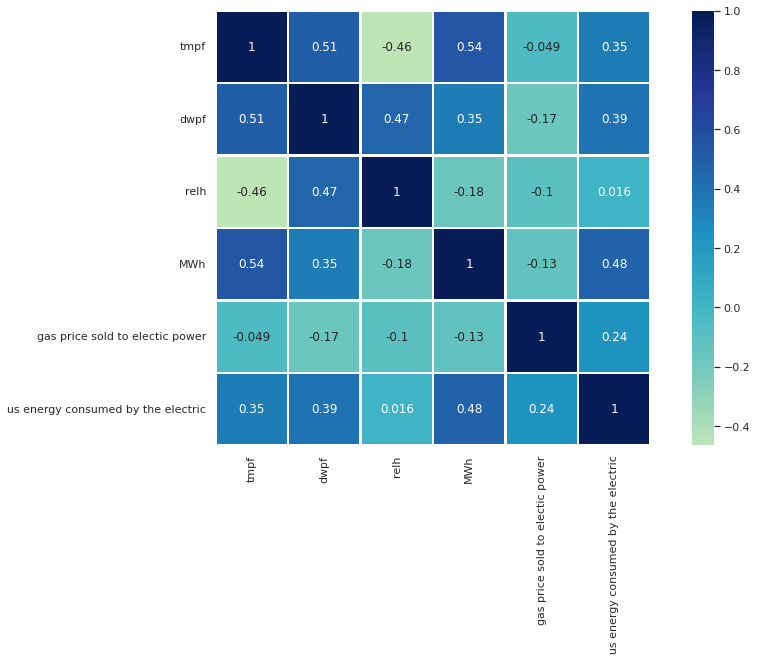

In [86]:
corr = df_new.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr, annot=True, square=True, cmap="YlGnBu", center=0, linewidths=1.5)
plt.yticks(rotation=0)
plt.show()

* The target varibale 'MWh' is highly correlated with 'tmpf', 'dwpf'

* After we scaled the variables and plotted, we can observe that  'Dwpf' and 'relh' are highly correlated, and similarly, 'temp' and 'dwpf' are also correlated.

* As the variables are correlated with each other we can use them of the modelling part. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


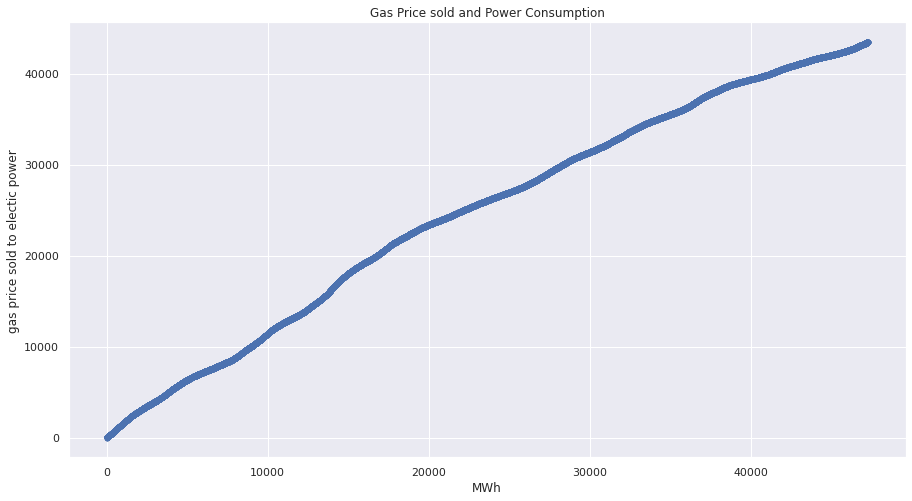

In [87]:
import matplotlib.pyplot as plot
p2.plot.scatter(x='MWh', y='gas price sold to electic power', title= "Gas Price sold and Power Consumption");
plot.show(block=True);

* By looking at the scatter plot of the variable price with our target variables, we can say that there is an increasing trend, and we can plot an  straight line relation between the variables.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


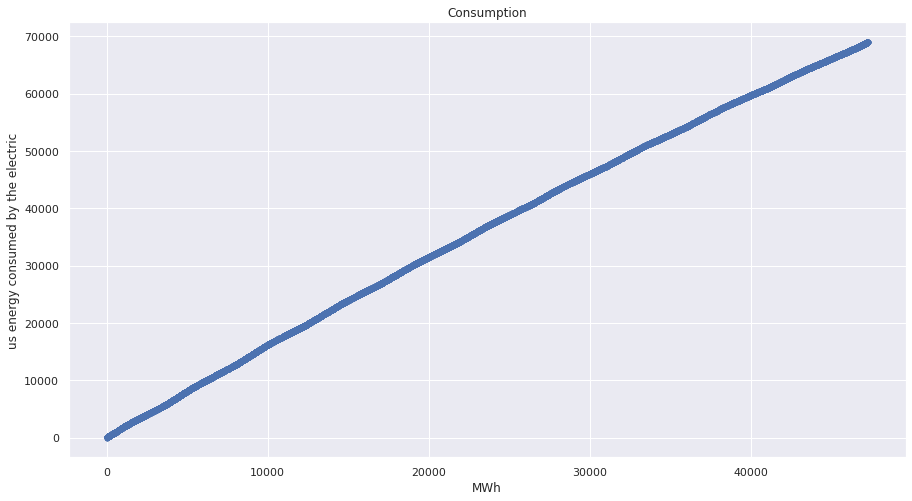

In [91]:
p2.plot.scatter(x='MWh', y='us energy consumed by the electric', title= "Consumption");
plot.show(block=True);

* The scatter plot above depicts the relation between the power consumption and the 'energy consumed by the electric' we can see the same trend as the above graph, where there is an increasing trend.

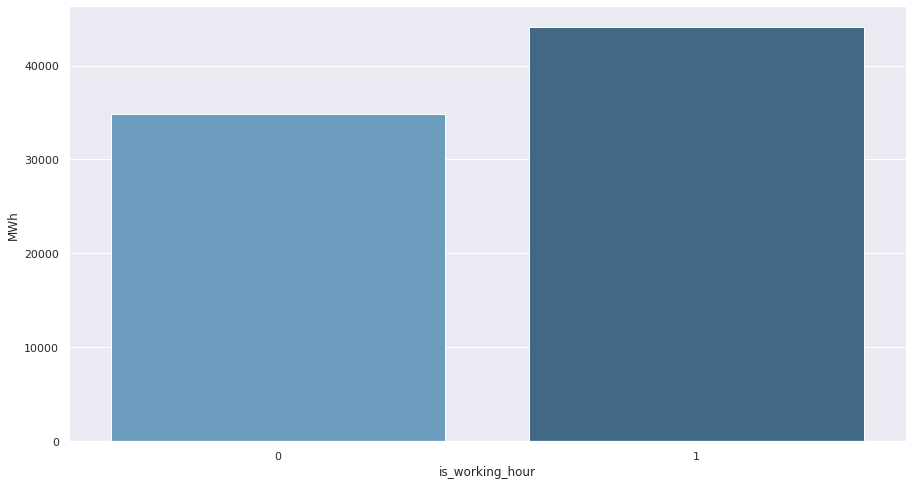

In [89]:
sns.barplot(x = 'is_working_hour',y = 'MWh', data = p3, palette="Blues_d")
plt.show()

* From the above graph, we can say that the power consumption is high during working hours, around 43,500 and 34,800 during non-working hours where working hours are between 8 AM to 10 PM.

#Modeling

In [ ]:
# standard modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# RNN-specific modules
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,accuracy_score
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, GRU, LSTM, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

## Define X and Y train/test splits


####Scale features in train and test partitions

In [ ]:
training.columns

Index(['tmpf', 'dwpf', 'relh', 'MWh', 'quarter', 'month', 'day', 'hour',
       'day of week', 'gas price sold to electic power',
       'us energy consumed by the electric', 'Air Temperature/Day',
       'Dew Point Temperature/Day', 'Relative Humidity/Day'],
      dtype='object')

In [ ]:
#for train data
from sklearn.preprocessing import StandardScaler

scaled_features = training.copy()
col_names = ['tmpf', 'dwpf', 'relh','MWh','quarter','month','day','hour', 'gas price sold to electic power','us energy consumed by the electric',
             'Air Temperature/Day','Dew Point Temperature/Day', 'Relative Humidity/Day']

features = scaled_features[col_names]
scaler = StandardScaler()
features = scaler.fit_transform(features.values)
scaled_features[col_names] = features

training_scale = scaled_features

In [ ]:
#for test data
scaled_features = test.copy()
col_names = ['tmpf', 'dwpf', 'relh','MWh','quarter','month','day','hour', 'gas price sold to electic power','us energy consumed by the electric',
             'Air Temperature/Day','Dew Point Temperature/Day', 'Relative Humidity/Day']

features = scaled_features[col_names]
features = scaler.transform(features.values)
scaled_features[col_names] = features

test_scale = scaled_features

In [ ]:
y_train = training_scale[['MWh']] # target variable (training)
X_train = training_scale.drop(['MWh'], axis=1) # variables
print(training.shape, X_train.shape, y_train.shape) # check shape

(78887, 14) (78887, 13) (78887, 1)


In [ ]:
y_test = test_scale[['MWh']] # target variable (test)
X_test = test_scale.drop(['MWh'], axis=1) # variables
print(test.shape, X_test.shape, y_test.shape) # check shape

(8784, 14) (8784, 13) (8784, 1)


In [ ]:
X_test_nscale = test.drop(['MWh'], axis=1)

In [ ]:
from numpy import array

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in np.arange(len(sequences)): # be careful of this line!
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
    # X and Y have been updated so the last two columns drop off
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1:]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
n_steps = 30 # we tried from 10-30, 30 is the best 
raw_seq = np.array(training_scale) 
X_train, y_train = split_sequences(raw_seq, n_steps=30)

In [ ]:
raw_seq = np.array(test_scale) 
X_test, y_test = split_sequences(raw_seq, n_steps=30)

In [ ]:
# check shape
print(training.shape, X_train.shape, y_train.shape)
print(test.shape, X_test.shape, y_test.shape)

(78887, 14) (78858, 30, 13) (78858, 1)
(8784, 14) (8755, 30, 13) (8755, 1)


In [ ]:
# here's the first X
X_train[0]

array([[-2.00362165, -1.43536258,  0.3243647 , -1.27509842, -1.35057733,
        -1.60159003, -1.67377066, -1.66132225,  5.        ,  1.3779723 ,
         0.9343524 , -0.87016266, -0.49631468],
       [-1.94179428, -1.37133676,  0.33131353, -1.31809104, -1.35057733,
        -1.60159003, -1.67377066, -1.51685761,  5.        ,  1.3779723 ,
         0.9343524 , -1.37510834, -0.66705043],
       [-1.94179428, -1.43536258,  0.2278987 , -1.36675693, -1.35057733,
        -1.60159003, -1.67377066, -1.37239298,  5.        ,  1.3779723 ,
         0.9343524 , -1.48846349, -0.78443125],
       [-2.00362165, -1.37133676,  0.43268458, -1.37788641, -1.35057733,
        -1.60159003, -1.67377066, -1.22792834,  5.        ,  1.3779723 ,
         0.9343524 , -1.66364873, -0.90181208],
       [-2.11697184, -1.37133676,  0.63174789, -1.35783557, -1.35057733,
        -1.60159003, -1.67377066, -1.0834637 ,  5.        ,  1.3779723 ,
         0.9343524 , -1.66364873, -0.83778617],
       [-2.00362165, -1.253956

In [ ]:
# here's the first y
y_train[0]

array([0.64278855])

In [ ]:
# set n_steps and n_features for modeling
n_steps = X_train.shape[1]
n_features = X_train.shape[2]
print(n_steps, n_features)

30 13


## GRU Architecuture (Our Best Model)

In [ ]:
# define model
model6 = Sequential() 
model6.add(GRU(120,input_shape=(n_steps,n_features) , activation='relu')) 
model6.add(Dropout(0.1))
model6.add(Dense(1))
model6.compile(optimizer='adam', loss='mse',metrics=['mae'])
model6.summary() # show model details

# earlying stopping
es = EarlyStopping(monitor='val_loss', mode='min', 
                   patience=10, 
                   verbose=1,
                   restore_best_weights=True) 

# fit model 
history = model6.fit(X_train, y_train, 
          epochs=70, 
          batch_size=100, 
          validation_split=0.2, # val is a random 20% of the data since we set shuffle = True
          verbose=1,
          callbacks=[es],
          shuffle=True)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 120)               48600     
                                                                 
 dropout_4 (Dropout)         (None, 120)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 121       
                                                                 
Total params: 48,721
Trainable params: 48,721
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
631/631 [==============================] - 42s 64ms/step - loss: 0.0665 - mae: 0.1651 - val_loss: 0.0095 - val_mae: 0.0621
Epoch 2/500
631/631 [==============================] - 40s 63ms/step - loss: 0.0144 - mae: 0.0839 - val_loss: 0.0060 - val_mae: 0.0479
Epoch 3/500
631/631 [=======================

KeyboardInterrupt: ignored

In [ ]:
# make a prediction
pred = model6.predict(X_test)# the pred

# calculate test_MAE
from sklearn.metrics import mean_absolute_error
print('MAE: ', mean_absolute_error(y_test, pred))

MAE:  0.013464952983238725


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print('MAPE: ', mean_absolute_percentage_error(y_test, pred))

MAPE:  0.08733074713712063


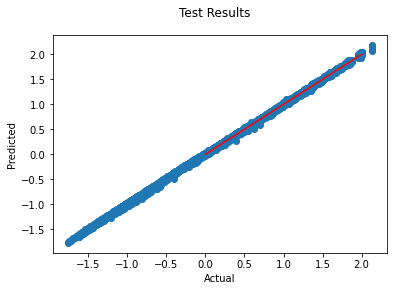

In [ ]:
# Make plots
actual = y_test # the actual
plt.scatter(x=actual, y=pred)
x = np.linspace(0,2)
plt.plot(x, x, color='red')
plt.suptitle('Test Results')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


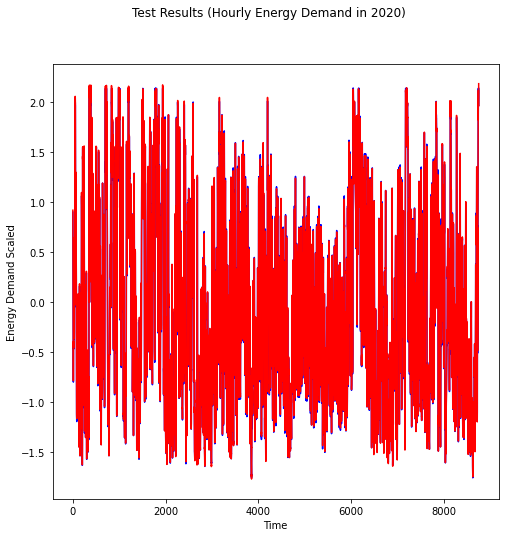

In [ ]:
# show timeseries plot on the train and validation data
plt.figure(figsize=(8,8))
plt.plot(np.arange(X_test.shape[0]), y_test, color='blue') # actual data
plt.plot(np.arange(X_test.shape[0]), pred, color='red') # predicted data
plt.suptitle('Test Results (Hourly Energy Demand in 2020)')
plt.xlabel('Time')
plt.ylabel('Energy Demand Scaled')
plt.show()

# Analysis Plots 

In [ ]:
#Analysis plots
#convert to dataframe
y_test_df = pd.DataFrame(test)


In [ ]:
y_test_df.head(1)

,tmpf,dwpf,relh,MWh,quarter,month,day,hour,day of week,gas price sold to electic power,us energy consumed by the electric,Air Temperature/Day,Dew Point Temperature/Day,Relative Humidity/Day
0,41.0,30.9,67.03,37460.838975,1,1,1,0,2,1.96,3025.031,34.0,17.1,49.55


In [ ]:
#calculate difference of actual vs predicted MWh
#d1 = pd.concat([y_test, pred], axis=1)
#d1['month','day','hour'] = y_test_df['month','day','hour']
#d1['residual'] = d1.MWh - d1.Pred_MWh #calculate diff
#month = d1.groupby('month')['residual'].mean() # residual errors by hour
#day = d1.groupby('day')['residual'].mean() # by day
#hour = d1.groupby('hour')['residual'].mean() # by month

In [ ]:
d1=pd.DataFrame()
d1 = pd.concat([y_test_df,pred], axis=1)


In [ ]:
d1.head(1)

,tmpf,dwpf,relh,MWh,quarter,month,day,hour,day of week,gas price sold to electic power,us energy consumed by the electric,Air Temperature/Day,Dew Point Temperature/Day,Relative Humidity/Day,0
0,41.0,30.9,67.03,37460.838975,1,1,1,0,2,1.96,3025.031,34.0,17.1,49.55,0.91561


In [ ]:
d1.dropna()
d1['Pred_MWh'] = pred

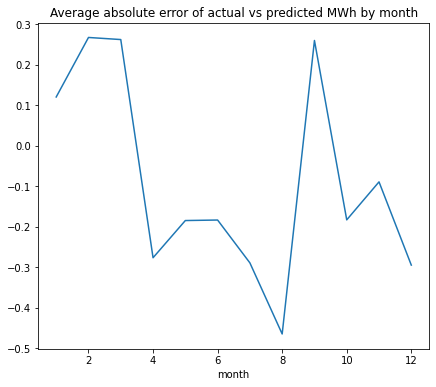

In [ ]:
month =(d1.groupby('month')['Pred_MWh'].mean())

plt.figure(figsize=(7,6))
plt.plot(month.index, month)
plt.title("Average absolute error of actual vs predicted MWh by month")
plt.xlabel("month")
plt.show()

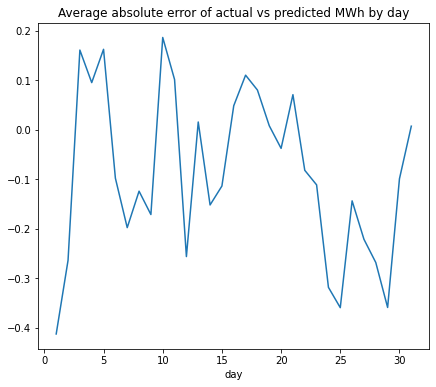

In [ ]:
day =d1.groupby('day')['Pred_MWh'].mean()
plt.figure(figsize=(7,6))
plt.plot(day.index,day)
plt.title("Average absolute error of actual vs predicted MWh by day")
plt.xlabel("day")
plt.show()

* model over predicts for days between 5 - 14

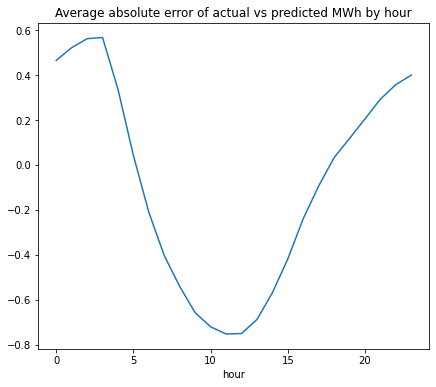

In [ ]:
hour =d1.groupby('hour')['Pred_MWh'].mean()
plt.figure(figsize=(7,6))
plt.plot(hour.index, hour)
plt.title("Average absolute error of actual vs predicted MWh by hour")
plt.xlabel("hour")
plt.show()

* Overall our model only average deviates from the actual energy demand values by very less deviations as can be seen from the plots above. 

## Model Results and Analysis workflow

### How to find the variables from the weather dataset




* First, we focused on humidy and temperature varialbes only (tmp, dwpf, rehl, feel). The best model MAE was around 7 and resutls plot showed overfitting.
* Next, we tried to keep most of the variables from the original data. However,  models did not fit at all.
* Then we tried removing feel(apparent temp), adding sknt (wind speed). However,  models did not fit again. 
* Later, we removed feel (apparent temp) and sknt (winf speed), added alti, mslp (both related to pressure). The best model MAE was over 10.
* Finally, we only kept the 3 variables tmp, dwpf,relh. Both plots predicted vs actual and time series plot look satisfactory. Meanwhile, we got the best MAE.





### How to find the best model

* SimpleRNN performed better than LSTM. GRU perfomed better than simpleRNN.
* After adding conv and pooling layers, MAE increased. 
* One layer model performance was much better than two and more layer model.
* We changed batch_size to 100, which improved model performance.
* We tried dropout from 0.1-0.5, and 0.1 was the best.
* We tried RNN layers 30, 60, 120, 180, and 120 is the best.

# Analysis & Business Values

* From the results scatterplot, there is no real overestimation. All the blue dots are near the red line, which means that the results predicted energy 'MWh' from our model closely match with the actual values. 
* From the time series plot, although we can see peaks missing, it's the characteristic of a recurrent neural network. However, both the blue and the red curves have very close and good correlation, which means that our model has overall provided accurate estimates of energy demand as a function of time. 
* The use of external sources, tweaking hyperparmeters to optimize the model and using historical data has helped to provide an efficient model that closely relates to actual values of the hourly energy deman in the year 2020.

* The electricity demand forecasting model can be used for decision making in power planning. An underestimate can lead to undercapacity, resulting in poor quality of supply services. On the other hand, an overestimate can make the authorization of a plan needless for several years. Therefore, the demanding forecasting model plans an important role in energy system operation. 
* Another use for the electricity demand forecasting modle is to assess the impact of a new technology might have on energy consumption. More precise estimate helps planners evaluate the cost effectiveness to invest a new technology on progapating electricity power. 
* In the future, besides the weather and time features, economic factors can also be considered as variables to provide better forecasting model performance. These variables can be income, population, unemployment rate, etc. 


# Conclusion & Inferences:

* While the weather data is very helpful predicting the energy demand, we needed to use some external data sets, i.e Texas natual gas price sold to electric power consumers and second one is one of the datasets of US total energy consumption, which is only electric power sector consumption. Essentially since both these datasets are time varying and sequential in nature, this has enhanced the model performance and learning. 

* The Texas natural gas price sold the consumers gave us an idea of the changing cost of natural gas prices over time and total energy consumption of the us electric grid gave us the intiution for the total energy cosumped by the grid from various sources. 

* From the various models tried out, our best model was a GRU neural network with 120 layers.
* We did try creating a combination of stacked layers using conv1d, maxpooling, SimpleRNN, LSTM and GRU as well, however they did not do much to improve the mean absolute error and it was a bit of over engineering as well as the model was severly overfitting. 




#Participation

* Yanbei Zhu - Did models, result scatterplot, time serious plot and model 
comparison.

* Nitish Ledalla - Introduction, Basic EDA and Descriptive statistics, Visualization and Analysis  

# References

* https://cnr.ncsu.edu/news/2021/03/lights-out-climate-change-could-plunge-america-into-darkness-heres-why/

* https://www.datarevenue.com/en-blog/machine-learning-for-energy-transmission

*   https://www.eia.gov/totalenergy/data/monthly/pdf/sec2.pdf

* https://regulationbodyofknowledge.org/wp-content/uploads/2013/03/Mehra_Demand_Forecasting_for.pdf

* https://www.kaggle.com/code/andreshg/timeseries-analysis-a-complete-guide#3.-Feature-engineering-%F0%9F%94%A7



